## Importação de libs

In [2]:
# para ler arquivo excel (xls)
# conda install -c anaconda xlrd

import datetime
from datetime import datetime
import os

# Analise
import pandas as pd 
import numpy as np 

#Visualization
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly
import plotly.express as px

## Parâmetros

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('max_colwidth', 1000) # tamanho das colunas para exibição do conteúdo de textos longos

np.set_printoptions(threshold=1000)

# Formatar numeros float (2 casas decimais)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# Formatações para gráficos
sns.set(style="darkgrid") #cor da area dos plots
figsize = (10,10)

carga dos dados das ies com os dados do IBGE e total de matriculas e numero de cursos  - de 2012 a 2022

In [35]:
list_col_string = ['CO_IES'] 
dict_dtype = {column : 'str'  for column in list_col_string}

ies = pd.read_csv('../arquivos/dados_ies_taes_docentes_2012_2022.csv', 
                  dtype = dict_dtype, low_memory=False)




In [36]:
ies = ies.drop('Unnamed: 0', axis=1)
ies.head()

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,CO_MESORREGIAO_IES,NO_MICRORREGIAO_IES,CO_MICRORREGIAO_IES,TP_ORGANIZACAO_ACADEMICA,Tipo_Org_Acad,TP_CATEGORIA_ADMINISTRATIVA,Tipo_Cat_Admn,NO_MANTENEDORA,CO_MANTENEDORA,CO_IES,NO_IES,SG_IES,DS_ENDERECO_IES,DS_NUMERO_ENDERECO_IES,DS_COMPLEMENTO_ENDERECO_IES,NO_BAIRRO_IES,NU_CEP_IES,QT_TEC_TOTAL,QT_TEC_FUNDAMENTAL_INCOMP_FEM,QT_TEC_FUNDAMENTAL_INCOMP_MASC,QT_TEC_FUNDAMENTAL_COMP_FEM,QT_TEC_FUNDAMENTAL_COMP_MASC,QT_TEC_MEDIO_FEM,QT_TEC_MEDIO_MASC,QT_TEC_SUPERIOR_FEM,QT_TEC_SUPERIOR_MASC,QT_TEC_ESPECIALIZACAO_FEM,QT_TEC_ESPECIALIZACAO_MASC,QT_TEC_MESTRADO_FEM,QT_TEC_MESTRADO_MASC,QT_TEC_DOUTORADO_FEM,QT_TEC_DOUTORADO_MASC,IN_ACESSO_PORTAL_CAPES,IN_ACESSO_OUTRAS_BASES,IN_ASSINA_OUTRA_BASE,IN_REPOSITORIO_INSTITUCIONAL,IN_BUSCA_INTEGRADA,IN_SERVICO_INTERNET,IN_PARTICIPA_REDE_SOCIAL,IN_CATALOGO_ONLINE,QT_PERIODICO_ELETRONICO,QT_LIVRO_ELETRONICO,QT_DOC_TOTAL,QT_DOC_EXE,QT_DOC_EX_FEMI,QT_DOC_EX_MASC,QT_DOC_EX_SEM_GRAD,QT_DOC_EX_GRAD,QT_DOC_EX_ESP,QT_DOC_EX_MEST,QT_DOC_EX_DOUT,QT_DOC_EX_INT,QT_DOC_EX_INT_DE,QT_DOC_EX_INT_SEM_DE,QT_DOC_EX_PARC,QT_DOC_EX_HOR,QT_DOC_EX_0_29,QT_DOC_EX_30_34,QT_DOC_EX_35_39,QT_DOC_EX_40_44,QT_DOC_EX_45_49,QT_DOC_EX_50_54,QT_DOC_EX_55_59,QT_DOC_EX_60_MAIS,QT_DOC_EX_BRANCA,QT_DOC_EX_PRETA,QT_DOC_EX_PARDA,QT_DOC_EX_AMARELA,QT_DOC_EX_INDIGENA,QT_DOC_EX_COR_ND,QT_DOC_EX_BRA,QT_DOC_EX_EST,QT_DOC_EX_COM_DEFICIENCIA,CO_PROJETO,CO_LOCAL_OFERTA,NO_LOCAL_OFERTA,COD_IBGE,LAT,LNG,POP_IBGE_2013,POP_IBGE_2022,CAPITAL,TIPO_INST,QT_MAT,CO_CURSO
0,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,4,Cuiabá,17,1,Universidade,1,Pública Federal,FUNDACAO UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Avenida Fernando Correa da Costa,2367,Cidade Universitária,Boa Esperança,78060900.00,1379,2,19,2,14,32,67,123,141,313,316,170,105,45,30,1,0,1,1,1,1,1,1,0,46094,1738,1637,819,818,0,62,68,205,1302,1585,1313,272,52,0,49,170,313,350,247,182,143,183,1023,85,431,43,8,47,1609,28,6,NaN,NaN,NaN,5103403,-15.57,-56.07,569830,694244,1,Pública,13855.00,88.00
1,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,4,Cuiabá,17,1,Universidade,4,Privada com fins lucrativos,PITAGORAS - SISTEMA DE EDUCACAO SUPERIOR SOCIEDADE LTDA,1204,780,UNIVERSIDADE DE CUIABÁ,UNIC/UNIME,Avenida Manoel José de Arruda,3100,UNIC - Beira Rio I (SEDE),Jardim Europa,78065900.00,121,0,0,0,1,17,34,10,12,11,13,9,9,3,2,0,0,1,1,1,1,1,1,60395,238009,374,374,200,174,0,0,128,146,100,124,0,124,178,72,20,56,51,63,60,54,25,45,238,20,105,11,0,0,374,0,4,NaN,NaN,NaN,5103403,-15.57,-56.07,569830,694244,1,Privada,9470.00,40.00
2,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,4,Cuiabá,17,2,Centro Universitário,4,Privada com fins lucrativos,EDITORA E DISTRIBUIDORA EDUCACIONAL S/A,14514,1233,CENTRO UNIVERSITÁRIO UNIC,NaN,Avenida Manoel José de Arruda,3001,- de 2865/2866 a 3550/3551,Jardim Europa,78065443.00,324,0,0,0,1,30,52,102,42,42,13,17,15,6,4,0,0,1,1,1,1,1,1,60395,238009,96,96,37,59,0,0,37,22,37,8,0,8,57,31,5,10,11,20,13,11,9,17,58,6,31,1,0,0,96,0,1,NaN,NaN,NaN,5103403,-15.57,-56.07,569830,694244,1,Privada,1348.00,10.00
3,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,4,Cuiabá,17,3,Faculdade,5,Privada sem fins lucrativos,ASSOCIACAO DOM AQUINO CORREA - ADAC,14981,1941,FACULDADE CUIABÁ,FAUC,Rua Pimenta Bueno,534,Faculdade Católica de Cuiabá,Dom Aquino,78015190.00,27,1,0,2,1,7,1,4,2,5,1,0,3,0,0,0,0,1,0,1,1,0,1,372,12215,31,30,12,18,0,0,5,22,3,5,0,5,18,7,1,5,7,5,3,6,2,1,9,0,15,0,0,6,30,0,1,NaN,NaN,NaN,5103403,-15.57,-56.07,569830,694244,1,Privada,534.00,5.00
4,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,4,Cuiabá,17,3,Faculdade,4,Privada com fins lucrativos,ASSUPERO ENSINO SUPERIOR LTDA.,2415,1996,INSTITUTO CUIABÁ DE ENSINO E CULTURA,ICEC,Rua Osvaldo da Silva Co

In [9]:
def gerar_plot_evol_ano(df, col_ano, col_grupo, col_soma, legenda_outside, funcao, titulo):

    # exibe primeiros registros do df
    print('Exibindo alguns registros do df consolidado...\n')
    if funcao == 'sum':
        df_plot = df.groupby([col_ano, col_grupo])[col_soma].sum().reset_index().rename(columns={col_soma:'Total'})
    elif funcao == 'count':
        df_plot = df.groupby([col_ano, col_grupo])[col_soma].count().reset_index().rename(columns={col_soma:'Total'})
    display(df_plot.head(5))
    
    ano_min = df_plot[col_ano].min()
    ano_max = df_plot[col_ano].max()
    
    print(f'Soma da coluna {col_soma} nos anos de {ano_min} a {ano_max}: {df[col_soma].sum()}')

    f, axes = plt.subplots(1, 1,  figsize=(20,8))

    # controle dos valores do eixo Y 
    data = df_plot.copy()
    y_max = df_plot['Total'].max()
    print(y_max)
    if y_max >= 10000: 
        data['Total'] = data['Total']/1000
        limite_sup = y_max/1000 * 1.10
        intervalo = round((limite_sup/10)/100)*100
        if intervalo==0: intervalo = limite_sup/10
        text_y_axis = 'Total (x 1000)'
        
    else:  
        limite_sup = y_max 
        intervalo = limite_sup / 10
        text_y_axis = 'Total'
        
    #limite_sup = df_plot['Total'].max()/1000 * 1.10
    
    sns.pointplot(x=col_ano, y='Total', hue=col_grupo, 
                data=data.sort_values(by=([col_ano,'Total']), ascending=[False,False]), ax=axes,
                 markers='o')
    
    axes.set_title(titulo, fontsize=20)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha="right", fontsize=16)
    axes.set(xlabel=''); axes.set_ylabel(text_y_axis, fontsize=18)
    
    major_yticks = np.arange(0, limite_sup, intervalo); 
    axes.set_yticks(major_yticks)
    axes.tick_params(axis='y', labelsize=14)
    axes.grid(color='gray', linestyle='--', linewidth=1.2, axis='both', alpha=.2)

    axes.legend(loc='best', fontsize=18)
    if legenda_outside == 'S':
        axes.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, 
                    ncol=2, fontsize='large')
    plt.show()

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,NO_REGIAO_IES,Total
0,2012,Centro-Oeste,236
1,2012,Nordeste,444
2,2012,Norte,154
3,2012,Sudeste,1173
4,2012,Sul,409


Soma da coluna CO_IES nos anos de 2012 a 2022: 17801233194119962330316433033648101161294613643148691807318114193491963519816198662121521681218082265022775240741780123319411996233031643303364810116129461364314869180731811419349196351981619866212152168121808226502277517801233194119962330316433033648495010116129461364314869180731811419635198161986621215216812180817801233194119962330316433033648377649501011612946136431486918010180731811419349196351981619866212152168121808219771780123319411996233031643303364837764950101161294613643148691801018073181141986617801072123319411996233031643303364837764950101161294613643148691801018073181141780107212331941199623303164330336483776495010116129461364314869181141780107212331941199623303164330336483776495010116129461364314869178086610721233194119962330316433033648377649501011612946136431486917808661072123319411996233031643303364837764950101161294613643148691780866107212331941199623302561316433033648377649501011612946136432402403404518706106011131173144

C:\Users\giluc\AppData\Local\Temp\ipykernel_18448\1938218637.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha="right", fontsize=16)


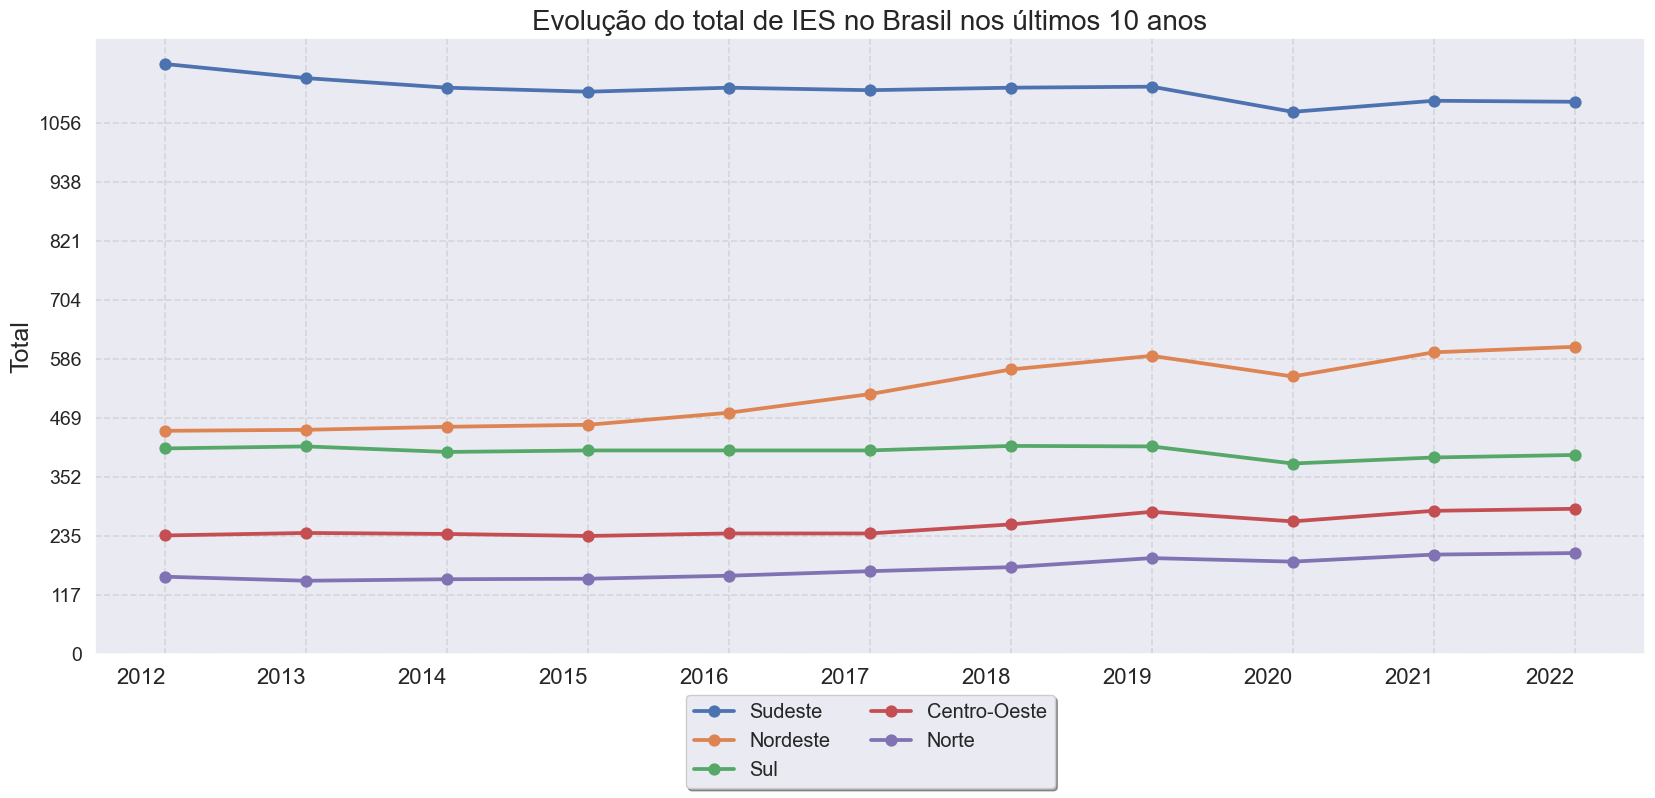

In [37]:
gerar_plot_evol_ano(ies,'NU_ANO_CENSO', 'NO_REGIAO_IES', 'CO_IES', 'S', 'count', 'Evolução do total de IES no Brasil nos últimos 10 anos')

gerando apenas para as publicas federais

In [11]:


df = ies[ies['TP_CATEGORIA_ADMINISTRATIVA'] == 1]
ies.head()

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,CO_MESORREGIAO_IES,NO_MICRORREGIAO_IES,CO_MICRORREGIAO_IES,TP_ORGANIZACAO_ACADEMICA,Tipo_Org_Acad,TP_CATEGORIA_ADMINISTRATIVA,Tipo_Cat_Admn,NO_MANTENEDORA,CO_MANTENEDORA,CO_IES,NO_IES,SG_IES,DS_ENDERECO_IES,DS_NUMERO_ENDERECO_IES,DS_COMPLEMENTO_ENDERECO_IES,NO_BAIRRO_IES,NU_CEP_IES,QT_TEC_TOTAL,QT_TEC_FUNDAMENTAL_INCOMP_FEM,QT_TEC_FUNDAMENTAL_INCOMP_MASC,QT_TEC_FUNDAMENTAL_COMP_FEM,QT_TEC_FUNDAMENTAL_COMP_MASC,QT_TEC_MEDIO_FEM,QT_TEC_MEDIO_MASC,QT_TEC_SUPERIOR_FEM,QT_TEC_SUPERIOR_MASC,QT_TEC_ESPECIALIZACAO_FEM,QT_TEC_ESPECIALIZACAO_MASC,QT_TEC_MESTRADO_FEM,QT_TEC_MESTRADO_MASC,QT_TEC_DOUTORADO_FEM,QT_TEC_DOUTORADO_MASC,IN_ACESSO_PORTAL_CAPES,IN_ACESSO_OUTRAS_BASES,IN_ASSINA_OUTRA_BASE,IN_REPOSITORIO_INSTITUCIONAL,IN_BUSCA_INTEGRADA,IN_SERVICO_INTERNET,IN_PARTICIPA_REDE_SOCIAL,IN_CATALOGO_ONLINE,QT_PERIODICO_ELETRONICO,QT_LIVRO_ELETRONICO,QT_DOC_TOTAL,QT_DOC_EXE,QT_DOC_EX_FEMI,QT_DOC_EX_MASC,QT_DOC_EX_SEM_GRAD,QT_DOC_EX_GRAD,QT_DOC_EX_ESP,QT_DOC_EX_MEST,QT_DOC_EX_DOUT,QT_DOC_EX_INT,QT_DOC_EX_INT_DE,QT_DOC_EX_INT_SEM_DE,QT_DOC_EX_PARC,QT_DOC_EX_HOR,QT_DOC_EX_0_29,QT_DOC_EX_30_34,QT_DOC_EX_35_39,QT_DOC_EX_40_44,QT_DOC_EX_45_49,QT_DOC_EX_50_54,QT_DOC_EX_55_59,QT_DOC_EX_60_MAIS,QT_DOC_EX_BRANCA,QT_DOC_EX_PRETA,QT_DOC_EX_PARDA,QT_DOC_EX_AMARELA,QT_DOC_EX_INDIGENA,QT_DOC_EX_COR_ND,QT_DOC_EX_BRA,QT_DOC_EX_EST,QT_DOC_EX_COM_DEFICIENCIA,CO_PROJETO,CO_LOCAL_OFERTA,NO_LOCAL_OFERTA,COD_IBGE,LAT,LNG,POP_IBGE_2013,POP_IBGE_2022,CAPITAL,TIPO_INST,QT_MAT,CO_CURSO
0,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,4,Cuiabá,17,1,Universidade,1,Pública Federal,FUNDACAO UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Avenida Fernando Correa da Costa,2367,Cidade Universitária,Boa Esperança,78060900.00,1379,2,19,2,14,32,67,123,141,313,316,170,105,45,30,1,0,1,1,1,1,1,1,0,46094,1738,1637,819,818,0,62,68,205,1302,1585,1313,272,52,0,49,170,313,350,247,182,143,183,1023,85,431,43,8,47,1609,28,6,NaN,NaN,NaN,5103403,-15.57,-56.07,569830,694244,1,Pública,13855.00,88.00
1,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,4,Cuiabá,17,1,Universidade,4,Privada com fins lucrativos,PITAGORAS - SISTEMA DE EDUCACAO SUPERIOR SOCIEDADE LTDA,1204,780,UNIVERSIDADE DE CUIABÁ,UNIC/UNIME,Avenida Manoel José de Arruda,3100,UNIC - Beira Rio I (SEDE),Jardim Europa,78065900.00,121,0,0,0,1,17,34,10,12,11,13,9,9,3,2,0,0,1,1,1,1,1,1,60395,238009,374,374,200,174,0,0,128,146,100,124,0,124,178,72,20,56,51,63,60,54,25,45,238,20,105,11,0,0,374,0,4,NaN,NaN,NaN,5103403,-15.57,-56.07,569830,694244,1,Privada,9470.00,40.00
2,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,4,Cuiabá,17,2,Centro Universitário,4,Privada com fins lucrativos,EDITORA E DISTRIBUIDORA EDUCACIONAL S/A,14514,1233,CENTRO UNIVERSITÁRIO UNIC,NaN,Avenida Manoel José de Arruda,3001,- de 2865/2866 a 3550/3551,Jardim Europa,78065443.00,324,0,0,0,1,30,52,102,42,42,13,17,15,6,4,0,0,1,1,1,1,1,1,60395,238009,96,96,37,59,0,0,37,22,37,8,0,8,57,31,5,10,11,20,13,11,9,17,58,6,31,1,0,0,96,0,1,NaN,NaN,NaN,5103403,-15.57,-56.07,569830,694244,1,Privada,1348.00,10.00
3,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,4,Cuiabá,17,3,Faculdade,5,Privada sem fins lucrativos,ASSOCIACAO DOM AQUINO CORREA - ADAC,14981,1941,FACULDADE CUIABÁ,FAUC,Rua Pimenta Bueno,534,Faculdade Católica de Cuiabá,Dom Aquino,78015190.00,27,1,0,2,1,7,1,4,2,5,1,0,3,0,0,0,0,1,0,1,1,0,1,372,12215,31,30,12,18,0,0,5,22,3,5,0,5,18,7,1,5,7,5,3,6,2,1,9,0,15,0,0,6,30,0,1,NaN,NaN,NaN,5103403,-15.57,-56.07,569830,694244,1,Privada,534.00,5.00
4,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,4,Cuiabá,17,3,Faculdade,4,Privada com fins lucrativos,ASSUPERO ENSINO SUPERIOR LTDA.,2415,1996,INSTITUTO CUIABÁ DE ENSINO E CULTURA,ICEC,Rua Osvaldo da Silva Co

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,NO_REGIAO_IES,Total
0,2012,Centro-Oeste,10
1,2012,Nordeste,26
2,2012,Norte,16
3,2012,Sudeste,34
4,2012,Sul,17


Soma da coluna CO_IES nos anos de 2012 a 2022: 13164131641316413164131641316413164131641316413164131642144081603721440816037214408160372144081603721440816037214408214408214408214408214408214408333333333334181241812418124181241812418124181241812418124181241812518205182051820518205182051820518205182051820518205182066666666666777777777778888888888857158814724571588147245715881472457158814724571588147245715881472457158814724571588147245715881472457158814724571588147245805871809580587180958058718095805871809580587180958058718095805871809580587180958058718095805871809580587180912121212121212121212121717171717171717171717634157863415786341578634157863415786341578634157863415786341578634157863415785817172209058171758171758171758171758171758171758171758171758171758171759118105911810591181059118105911810591181059118105911810591181059118105911810265865936336933163401621206215032302626586593633693316340162120621503230262658659363369331634016212062150323026265865936336933163401621206265865936336933

C:\Users\giluc\AppData\Local\Temp\ipykernel_18448\1938218637.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha="right", fontsize=16)


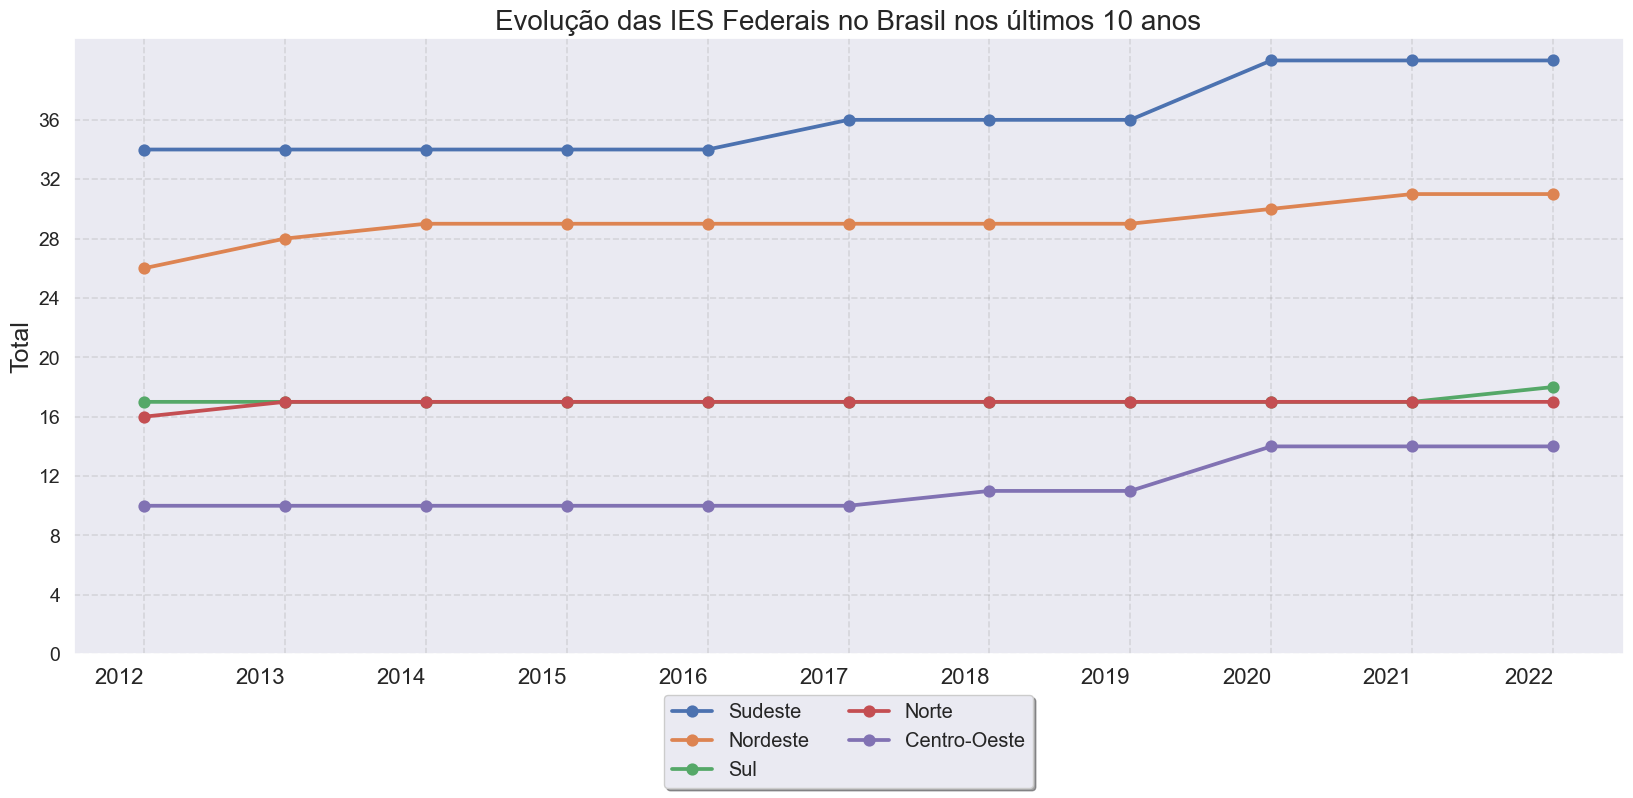

In [12]:
gerar_plot_evol_ano(df,'NU_ANO_CENSO', 'NO_REGIAO_IES', 'CO_IES', 'S', 'count','Evolução das IES Federais no Brasil nos últimos 10 anos')

gerando apenas paras as universidades federais

In [13]:
df2 = df[df['TP_ORGANIZACAO_ACADEMICA'] == 1]
#ies.head()

Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,NO_REGIAO_IES,Total
0,2012,Centro-Oeste,5
1,2012,Nordeste,15
2,2012,Norte,9
3,2012,Sudeste,19
4,2012,Sul,11


Soma da coluna CO_IES nos anos de 2012 a 2022: 11111111111222222222223333333333344444444444555555555556666666666677777777777888888888885715885715885715885715885715885715885715885715885715885715885715885805875805875805875805875805875805875805875805875805875805875805871212121212121212121212171717171717171717171763463463463463463463463463463463458171758171758171758171758171758171758171758171758171758171758171759159159159159159159159159159159158669358669358669358669358669358669358669358669358669358669358669358358358358358358358358358358358359559559559559559559559559559559557757757757757757757757757757757756959056959056959056959056959056959056959056959056959056959056959057857857857857857857857857857857858558558558558558558558558558558558958958958958958958958958958958910710710710710710710710710710710759759759759759759759759759759759757557557557557557557557557557557549254925492549254925492549254925492549254925573573573573573573573573573573573598598598598598598598598598598598532253225322532253

C:\Users\giluc\AppData\Local\Temp\ipykernel_18448\1938218637.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha="right", fontsize=16)


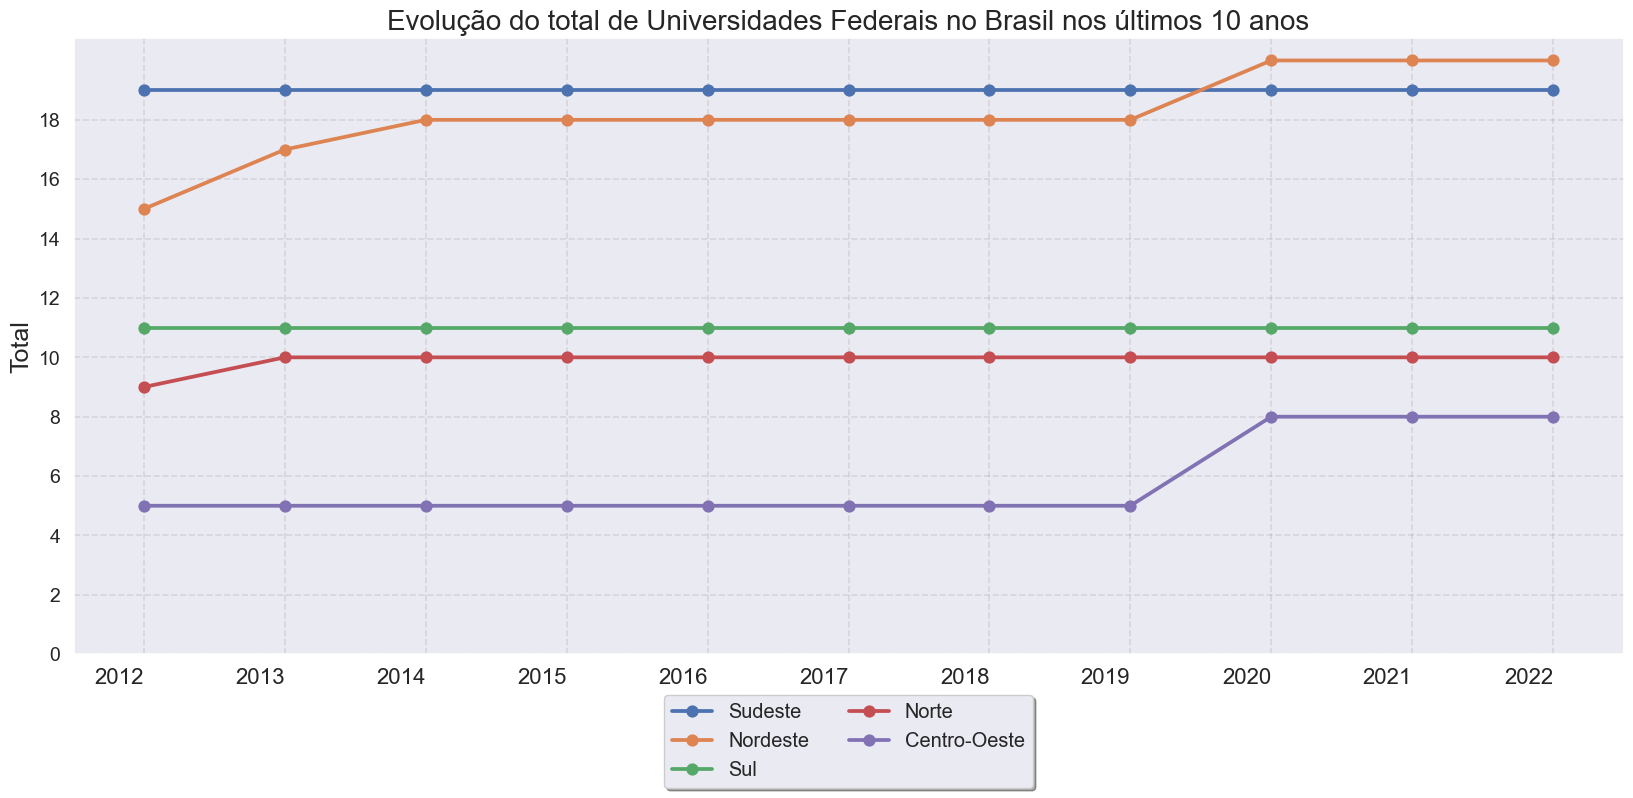

In [14]:
gerar_plot_evol_ano(df2,'NU_ANO_CENSO', 'NO_REGIAO_IES', 'CO_IES', 'S', 'count', 'Evolução do total de Universidades Federais no Brasil nos últimos 10 anos')

Tentativa de fazer os graficos dos TAES

In [39]:
df_regiao =  ies.groupby(['NO_REGIAO_IES', 'NU_ANO_CENSO']).agg({'QT_DOC_TOTAL':'sum', 'QT_TEC_TOTAL':'sum', 'QT_MAT':'sum'}).reset_index()
df_regiao['RELACAO_MATR_TAES'] = round((df_regiao['QT_TEC_TOTAL'] / df_regiao['QT_MAT'])*100,2)
df_regiao['RELACAO_MATR_DOCS'] = round((df_regiao['QT_DOC_TOTAL'] / df_regiao['QT_MAT'])*100,2)


Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,NO_REGIAO_IES,Total
0,2012,Centro-Oeste,5.95
1,2012,Nordeste,7.42
2,2012,Norte,6.60
3,2012,Sudeste,7.48
4,2012,Sul,8.73


Soma da coluna RELACAO_MATR_TAES nos anos de 2012 a 2022: 394.36
9.47


C:\Users\giluc\AppData\Local\Temp\ipykernel_18448\1938218637.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha="right", fontsize=16)


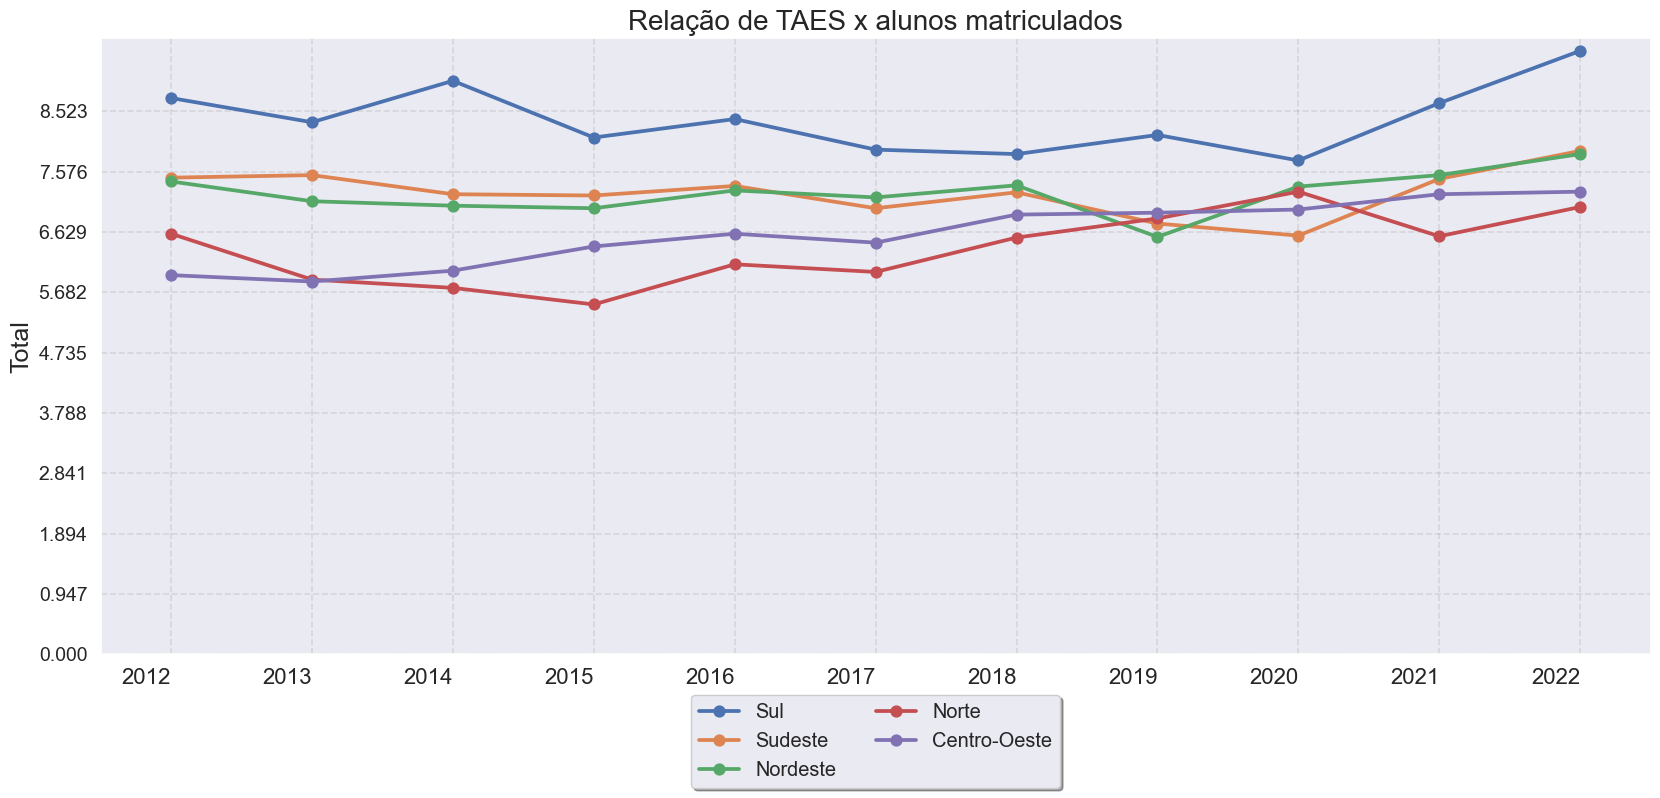

In [40]:
gerar_plot_evol_ano(df_regiao, 'NU_ANO_CENSO', 'NO_REGIAO_IES', 'RELACAO_MATR_TAES', 'S', 'sum', 'Relação de TAES x alunos matriculados')

In [42]:
df_regiao1 =  ies.groupby(['NU_ANO_CENSO', 'TIPO_INST']).agg({'QT_DOC_TOTAL':'sum', 'QT_TEC_TOTAL':'sum', 'QT_MAT':'sum'}).reset_index()

#df_regiao1 = df_regiao1.drop(df_regiao1[df_regiao1['QT_MAT'] == 0].index)
df_regiao1['RELACAO_MATR_TAES'] = round((df_regiao1['QT_TEC_TOTAL'] / df_regiao1['QT_MAT'])*100,2)
df_regiao1['RELACAO_MATR_DOCS'] = round((df_regiao1['QT_DOC_TOTAL'] / df_regiao1['QT_MAT'])*100,2)
df_regiao1 = df_regiao1.rename(columns={'RELACAO_MATR_TAES': 'TAES', 'RELACAO_MATR_DOCS':'Docentes'})



In [43]:
df_regiao1 = df_regiao1[['NU_ANO_CENSO', 'TIPO_INST','TAES','Docentes']].melt(id_vars=['NU_ANO_CENSO', 'TIPO_INST'], 
                   var_name='Tipo', 
                   value_name='valor').dropna()
df_regiao1['TIPO_INST_SERVIDOR'] = df_regiao1['Tipo'] + ' - ' + df_regiao1['TIPO_INST'] 
df_regiao1.head()


,NU_ANO_CENSO,TIPO_INST,Tipo,valor,TIPO_INST_SERVIDOR
0,2012,Privada,TAES,5.01,TAES - Privada
1,2012,Pública,TAES,17.98,TAES - Pública
2,2013,Privada,TAES,4.87,TAES - Privada
3,2013,Pública,TAES,17.56,TAES - Pública
4,2014,Privada,TAES,4.66,TAES - Privada


Exibindo alguns registros do df consolidado...



,NU_ANO_CENSO,TIPO_INST_SERVIDOR,Total
0,2012,Docentes - Privada,5.38
1,2012,Docentes - Pública,15.61
2,2012,TAES - Privada,5.01
3,2012,TAES - Pública,17.98
4,2013,Docentes - Privada,5.16


Soma da coluna valor nos anos de 2012 a 2022: 457.57000000000005
18.5


C:\Users\giluc\AppData\Local\Temp\ipykernel_18448\1938218637.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha="right", fontsize=16)


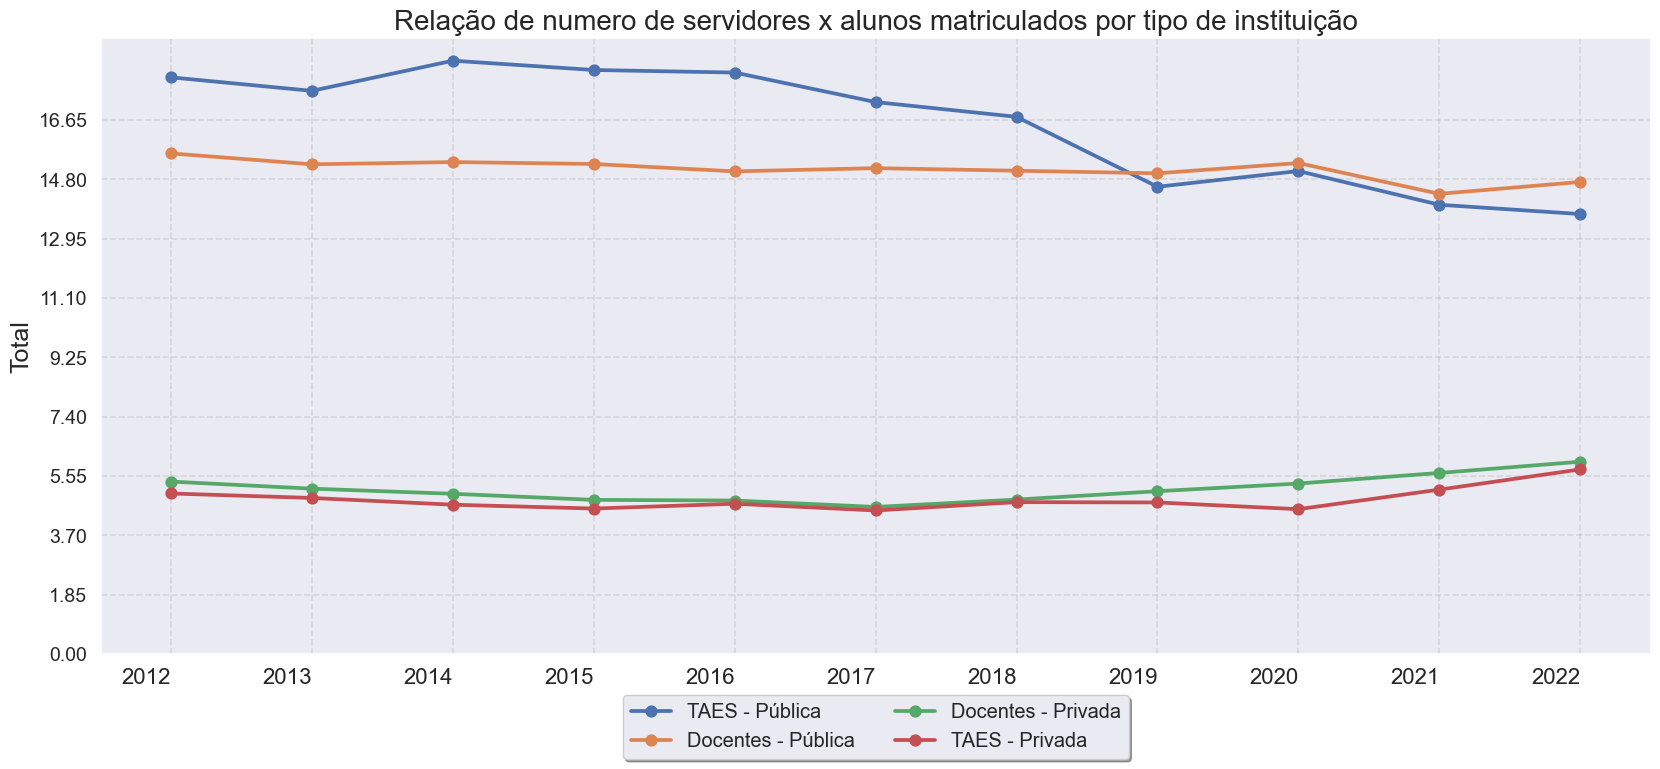

In [44]:
gerar_plot_evol_ano(df_regiao1, 'NU_ANO_CENSO', 'TIPO_INST_SERVIDOR', 'valor', 'S', 'sum', 'Relação de numero de servidores x alunos matriculados por tipo de instituição')